In [1]:
from sklearn.metrics import classification_report, confusion_matrix,\
    mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from copy import deepcopy
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.cluster.hierarchy as sch
import scipy
import os
import sys

# for manipulating data
import numpy as np
import pandas as pd

# for ploting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
df_train = pd.read_csv("C://Users//JCCLI//Downloads//YearPredTrain.csv")
df_test = pd.read_csv("C://Users//JCCLI//Downloads//YearPredTest.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 98 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    90000 non-null  int64  
 1   timbreAvg1    90000 non-null  float64
 2   timbreAvg2    90000 non-null  float64
 3   timbreAvg3    90000 non-null  float64
 4   timbreAvg4    90000 non-null  float64
 5   timbreAvg5    90000 non-null  float64
 6   timbreAvg6    90000 non-null  float64
 7   timbreAvg7    90000 non-null  float64
 8   timbreAvg8    90000 non-null  float64
 9   timbreAvg9    90000 non-null  float64
 10  timbreAvg10   90000 non-null  float64
 11  timbreAvg11   90000 non-null  float64
 12  timbreAvg12   90000 non-null  float64
 13  timbreCov1    90000 non-null  float64
 14  timbreCov2    90000 non-null  float64
 15  timbreCov3    90000 non-null  float64
 16  timbreCov4    90000 non-null  float64
 17  timbreCov5    90000 non-null  float64
 18  timbreCov6    90000 non-nu

In [4]:
df_train.Class = df_train.Class.astype('category')
# derive train sets for regression and classification task
train_reg = df_train.drop('Class', axis=1)
train_cat = df_train.drop('Year', axis=1)
# derive X from train set
train_X = df_train.drop(['Year', 'Class', 'averagesmean', 'Unnamed: 0', 'averagescov', 'avgcat', 'covcat','decade'], axis=1)
# derive y from train set
train_y_reg = df_train.Year
train_y_cat = df_train.Class


In [6]:
df_test.Class = df_test.Class.astype('category')
test_reg = df_test.drop('Class', axis=1)
test_cat = df_test.drop('Year', axis=1)
test_X = df_test.drop(['Year', 'Class', 'averagesmean','Unnamed: 0', 'averagescov','avgcat','covcat','decade'], axis=1)
test_y_reg = df_test.Year
test_y_cat = df_test.Class

In [7]:
scaler = StandardScaler()
train_stand_X = scaler.fit_transform(train_X)
test_stand_X = scaler.transform(test_X)

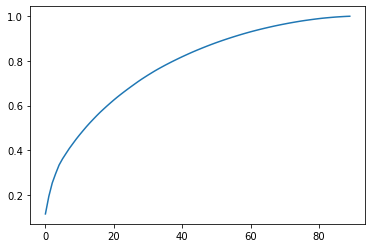

In [8]:
pca = PCA()
pca.fit(train_stand_X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [9]:
pca = PCA(n_components=0.95)

In [10]:
pca_X = pca.fit_transform(train_stand_X)

In [11]:
pca_X.shape

(90000, 67)

In [12]:
pca.components_.shape

(67, 90)

In [13]:
# reduced dataset
X_pca = pd.DataFrame(pca_X)
X_pca.head()


,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,-2.728599,0.886468,-0.519867,-0.461802,-1.309740,0.326190,-0.393208,-0.999762,0.458353,1.597991,...,0.371482,0.376350,-0.190222,0.034285,0.207016,0.300190,0.284636,0.070339,-0.165063,0.510876
1,11.544699,-11.087562,12.018235,2.797902,-0.947746,0.318070,1.343339,-1.658545,-1.666087,3.277880,...,-2.685767,3.371664,-1.388381,-1.290396,-1.994359,-0.483968,-0.642723,-0.750562,1.165402,0.390251
2,-2.431057,1.854304,0.727199,1.230938,0.125526,0.461955,-0.725252,1.145686,0.438304,-0.635436,...,-0.369906,-0.186924,0.311388,-0.293261,0.476415,-0.019116,-0.267627,0.822466,0.040392,-0.273661
3,5.213087,1.488027,1.475934,-0.127776,1.454696,-2.185592,-0.089862,0.026901,-1.882517,0.880001,...,0.150939,-0.255776,-0.176656,1.245119,0.035021,-0.451251,-0.537667,0.418899,-0.846130,0.652313
4,1.885916,-2.072772,1.824640,-3.414723,1.275266,0.953257,0.768149,1.637670,2.254481,1.009500,...,-0.106715,0.051254,0.210676,-0.361337,-0.514755,1.410896,-0.525747,-0.299097,0.357705,-0.499393


In [14]:
rbf_pca = KernelPCA(n_components=10, kernel='rbf', gamma=0.4)

In [15]:
param_grid = [{'C':[10, 50], 'kernel':['rbf'], 'gamma':[0.001, 0.1]}]

In [16]:
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, verbose=0, cv=3, scoring='accuracy')

In [ ]:
grid.fit(train_stand_X, train_y_cat)
